In [2]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np

In [3]:
img = cv2.imread('/content/drive/MyDrive/pfe sekcija/materijali za DOSL/ball.jpg')

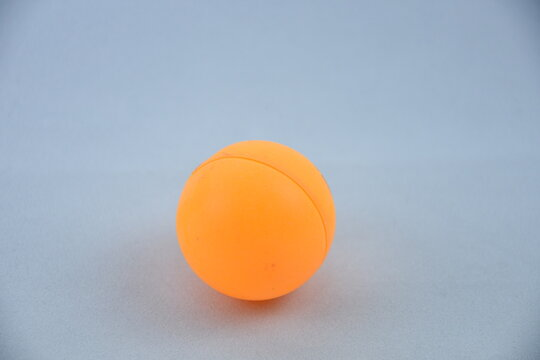

In [4]:
cv2_imshow(img)

In [5]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [20]:
orange_lower = np.array([4, 100, 100])
orange_upper = np.array([20, 255, 255])

In [21]:
mask = cv2.inRange(hsv_img, orange_lower, orange_upper)

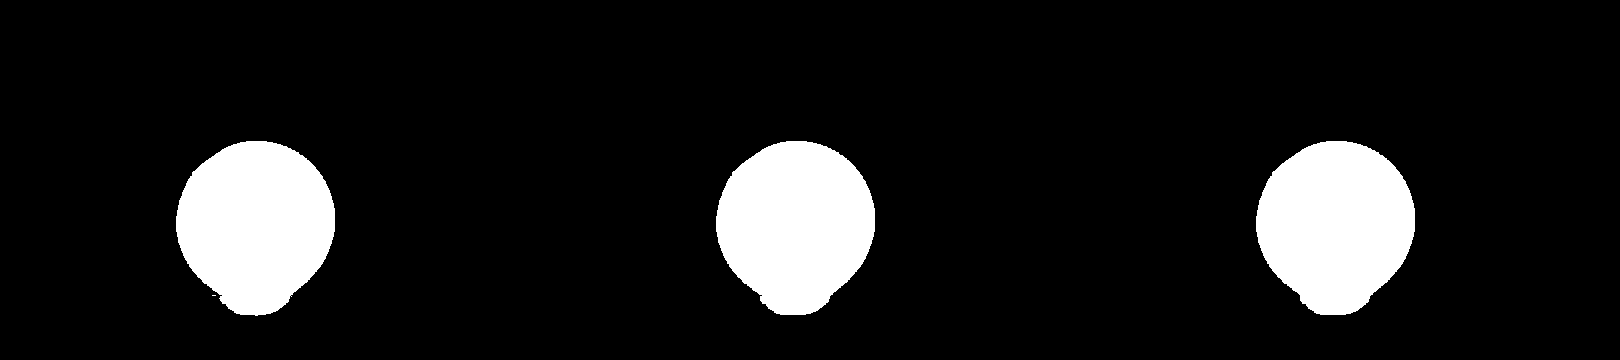

In [22]:
kernel = np.ones((5,5),np.uint8)
mask2 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask3 = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel)
masks = np.hstack((mask, mask2, mask3))
cv2_imshow(masks)

In [23]:
contours, hierarchy = cv2.findContours(mask3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [31]:
try:
  area = cv2.contourArea(contours[0])
  if area > 30: # Only consider contours with an area greater than 30 pixels
      (x,y), radius = cv2.minEnclosingCircle(contours[0])
      center = (int(x),int(y))
      radius = int(radius)
      cv2.circle(img, center, radius, (0,255,0), 2)
      print(f"center: {center}")
except:
  print("no contours found!")


center: (254, 227)


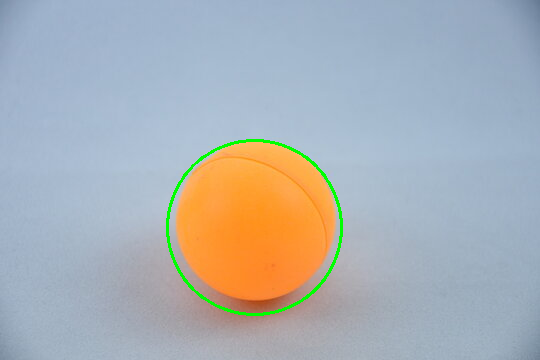

In [32]:
cv2_imshow(img)